### Імпорт модулів

In [21]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import time

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### Параметри моделі

In [4]:
batch_size = 128
nb_classes = 10
nb_epoch = 200

img_rows, img_cols = 32, 32
img_channels = 3

### Створити модель

In [5]:
model = Sequential()

# Note: it expects the data_format='channels_first'
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(img_channels, img_rows, img_cols)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

plot_model(model, to_file='model.png')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Завантажити набір даних CIFAR-10 та підготувати його до тренування

In [12]:
print('Loading data...')
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train = X_train.astype('float32') - 128
X_test = X_test.astype('float32') - 128
X_train /= 128
X_test /= 128

Loading data...
X_train shape: (50000, 3, 32, 32)
X_test shape: (10000, 3, 32, 32)
50000 train samples
10000 test samples
Y_train shape: (50000, 10)
Y_test shape: (10000, 10)


### Тренувати модель

In [7]:
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          validation_data=(X_test, Y_test),
          shuffle=True,
          callbacks=[ModelCheckpoint('weights/cifar.h5', save_best_only=False)])

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 122s 2ms/step - loss: 1.9418 - acc: 0.2657 - val_loss: 1.5577 - val_acc: 0.4251
Epoch 2/200
50000/50000 [==============================] - 122s 2ms/step - loss: 1.5025 - acc: 0.4433 - val_loss: 1.3231 - val_acc: 0.5152
Epoch 3/200
50000/50000 [==============================] - 122s 2ms/step - loss: 1.2990 - acc: 0.5267 - val_loss: 1.1833 - val_acc: 0.5766
Epoch 4/200
50000/50000 [==============================] - 124s 2ms/step - loss: 1.1385 - acc: 0.5902 - val_loss: 1.0438 - val_acc: 0.6241
Epoch 5/200
50000/50000 [==============================] - 131s 3ms/step - loss: 1.0264 - acc: 0.6329 - val_loss: 0.9228 - val_acc: 0.6718
Epoch 6/200
50000/50000 [==============================] - 156s 3ms/step - loss: 0.9324 - acc: 0.6697 - val_loss: 0.8030 - val_acc: 0.7171
Epoch 7/200
50000/50000 [==============================] - 156s 3ms/

50000/50000 [==============================] - 133s 3ms/step - loss: 0.2723 - acc: 0.9037 - val_loss: 0.5267 - val_acc: 0.8386
Epoch 58/200
50000/50000 [==============================] - 122s 2ms/step - loss: 0.2682 - acc: 0.9033 - val_loss: 0.5256 - val_acc: 0.8396
Epoch 59/200
50000/50000 [==============================] - 124s 2ms/step - loss: 0.2692 - acc: 0.9052 - val_loss: 0.5469 - val_acc: 0.8383
Epoch 60/200
50000/50000 [==============================] - 119s 2ms/step - loss: 0.2665 - acc: 0.9051 - val_loss: 0.5360 - val_acc: 0.8414
Epoch 61/200
50000/50000 [==============================] - 117s 2ms/step - loss: 0.2578 - acc: 0.9088 - val_loss: 0.5231 - val_acc: 0.8436
Epoch 62/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2538 - acc: 0.9098 - val_loss: 0.5418 - val_acc: 0.8403
Epoch 63/200
50000/50000 [==============================] - 127s 3ms/step - loss: 0.2542 - acc: 0.9097 - val_loss: 0.5371 - val_acc: 0.8385
Epoch 64/200
50000/50000 [=======

50000/50000 [==============================] - 129s 3ms/step - loss: 0.1844 - acc: 0.9354 - val_loss: 0.5761 - val_acc: 0.8475
Epoch 116/200
50000/50000 [==============================] - 145s 3ms/step - loss: 0.1846 - acc: 0.9341 - val_loss: 0.5835 - val_acc: 0.8449
Epoch 117/200
50000/50000 [==============================] - 162s 3ms/step - loss: 0.1842 - acc: 0.9347 - val_loss: 0.5914 - val_acc: 0.8429
Epoch 118/200
50000/50000 [==============================] - 151s 3ms/step - loss: 0.1850 - acc: 0.9347 - val_loss: 0.5617 - val_acc: 0.8476
Epoch 119/200
50000/50000 [==============================] - 156s 3ms/step - loss: 0.1800 - acc: 0.9359 - val_loss: 0.5562 - val_acc: 0.8438
Epoch 120/200
50000/50000 [==============================] - 154s 3ms/step - loss: 0.1743 - acc: 0.9382 - val_loss: 0.5737 - val_acc: 0.8418
Epoch 121/200
50000/50000 [==============================] - 150s 3ms/step - loss: 0.1826 - acc: 0.9366 - val_loss: 0.5772 - val_acc: 0.8461
Epoch 122/200
50000/50000 [

50000/50000 [==============================] - 156s 3ms/step - loss: 0.1562 - acc: 0.9464 - val_loss: 0.5847 - val_acc: 0.8462
Epoch 174/200
50000/50000 [==============================] - 132s 3ms/step - loss: 0.1597 - acc: 0.9459 - val_loss: 0.5818 - val_acc: 0.8505
Epoch 175/200
50000/50000 [==============================] - 138s 3ms/step - loss: 0.1565 - acc: 0.9471 - val_loss: 0.5834 - val_acc: 0.8485
Epoch 176/200
50000/50000 [==============================] - 143s 3ms/step - loss: 0.1541 - acc: 0.9475 - val_loss: 0.5705 - val_acc: 0.8546
Epoch 177/200
50000/50000 [==============================] - 139s 3ms/step - loss: 0.1516 - acc: 0.9481 - val_loss: 0.5825 - val_acc: 0.8470
Epoch 178/200
50000/50000 [==============================] - 112s 2ms/step - loss: 0.1557 - acc: 0.9463 - val_loss: 0.5796 - val_acc: 0.8506
Epoch 179/200
50000/50000 [==============================] - 109s 2ms/step - loss: 0.1506 - acc: 0.9491 - val_loss: 0.6054 - val_acc: 0.8450
Epoch 180/200
50000/50000 [

In [11]:
print('X_train shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
batch_size

X_train shape: (10000, 3, 32, 32)
Y_test shape: (10000, 10)


128

### Точність моделі

In [13]:
score, acc = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 7s 701us/step
Test score: 0.5850218866348267
Test accuracy: 0.8452


In [15]:
tic = time.perf_counter()

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=60,
                    validation_data=(X_test, Y_test),
                    shuffle=True,
                    callbacks=[ModelCheckpoint('weights/cifar.h5', save_best_only=False)])

toc = time.perf_counter()
print ("\nTraining time = " + str(toc - tic) + " sec.")

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 137s 3ms/step - loss: 0.1421 - acc: 0.9510 - val_loss: 0.5849 - val_acc: 0.8502
Epoch 2/60
50000/50000 [==============================] - 111s 2ms/step - loss: 0.1462 - acc: 0.9495 - val_loss: 0.5926 - val_acc: 0.8478
Epoch 3/60
50000/50000 [==============================] - 116s 2ms/step - loss: 0.1465 - acc: 0.9502 - val_loss: 0.5941 - val_acc: 0.8499
Epoch 4/60
50000/50000 [==============================] - 150s 3ms/step - loss: 0.1508 - acc: 0.9493 - val_loss: 0.5905 - val_acc: 0.8506
Epoch 5/60
50000/50000 [==============================] - 144s 3ms/step - loss: 0.1455 - acc: 0.9507 - val_loss: 0.6007 - val_acc: 0.8468
Epoch 6/60
50000/50000 [==============================] - 147s 3ms/step - loss: 0.1465 - acc: 0.9514 - val_loss: 0.5841 - val_acc: 0.8505
Epoch 7/60
50000/50000 [==============================] - 151s 3ms/step - loss: 0.1392 - acc: 0.9528 - val_loss: 0.6533 - 

50000/50000 [==============================] - 119s 2ms/step - loss: 0.1362 - acc: 0.9553 - val_loss: 0.6093 - val_acc: 0.8518
Epoch 60/60
50000/50000 [==============================] - 120s 2ms/step - loss: 0.1348 - acc: 0.9551 - val_loss: 0.6209 - val_acc: 0.8458

Training time = 7786.2896840070025 sec.


In [16]:
score, acc = model.evaluate(X_test, Y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 6s 625us/step
Test score: 0.6209137450218201
Test accuracy: 0.8458


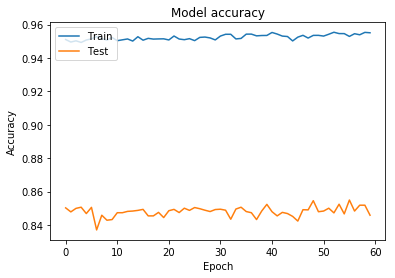

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

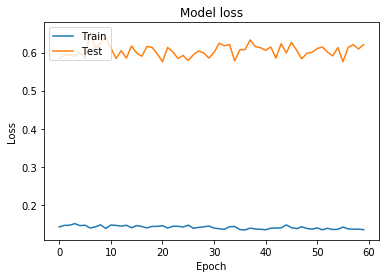

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()